In [1]:
img_pth = "buling_linces.png"
user_tesseract_cmd = r'E:\Program Files\Tesseract-OCR\tesseract.exe'

### easyocr

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
result = reader.readtext(img_pth, detail = 0)
result[0]

### pytesseract OCR

In [2]:
import pytesseract
from PIL import Image

def test():
    pytesseract.pytesseract.tesseract_cmd = r'E:\Program Files\Tesseract-OCR\tesseract.exe'
    img = Image.open(r"1.png")
    #img = Image.open(r"buling_linces.png")
    #img.show()
    print(pytesseract.image_to_string(img, lang="eng"))
    return img
img = test()

This is a test sentence. «

Can OCR recognize this?



In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [14]:
import numpy as np
img_arr = np.array(img) #are all you need
result = reader.readtext(img_arr, detail = 0)

In [15]:
result[0]

'6108'

### OPENCV降噪

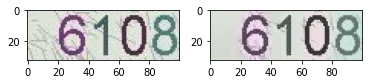

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
img = cv2.imread(img_pth)
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#dst = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGRA)
# dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(img)
#img = Image.fromarray(dst)
plt.subplot(122),plt.imshow(dst)
plt.show()

存檔

In [15]:
denoising_pth = 'denoising.jpg'
img.save(denoising_pth)

In [18]:
from selenium import webdriver
#from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller
import time
import base64
import requests
import io

browser = webdriver.Chrome(chromedriver_autoinstaller.install())
browser.get('https://building-management.publicwork.ntpc.gov.tw/bm_query.jsp?rt=3')

time.sleep(1)

drawImage_js_script = """
    var ele = arguments[0];
    var cnv = document.createElement('canvas');
    cnv.width = ele.width; cnv.height = ele.height;
    cnv.getContext('2d').drawImage(ele, 0, 0);
    return cnv.toDataURL('image/jpeg').substring(22);    
    """

img_base64 = browser.execute_script(drawImage_js_script, browser.find_element_by_css_selector("#codeimg"))

browser.close()

img_64decode = base64.b64decode(img_base64)

# without save
imageStream = io.BytesIO(img_64decode)
img = Image.open(imageStream)

# # save
# with open(img_pth, 'wb') as image:
#     image.write(img_64decode)

In [30]:
imageStream = io.BytesIO(img)
img = Image.open(imageStream)

In [31]:
img.show()

In [3]:
import pytesseract
import pyautogui
from PIL import Image
import cv2

In [4]:
import PIL.ImageDraw as ImageDraw
from PIL import *
from PIL import ImageEnhance

In [22]:
show_image = False

# Reference- https://stackoverflow.max-everyday.com/2019/06/python-opencv-denoising/
def getPixel(image,x,y,G,N):
    L = image.getpixel((x,y))
    if L > G:
        L = True
    else:
        L = False
 
    nearDots = 0
    if L == (image.getpixel((x - 1,y - 1)) > G):
        nearDots += 1
    if L == (image.getpixel((x - 1,y)) > G):
        nearDots += 1
    if L == (image.getpixel((x - 1,y + 1)) > G):
        nearDots += 1
    if L == (image.getpixel((x,y - 1)) > G):
        nearDots += 1
    if L == (image.getpixel((x,y + 1)) > G):
        nearDots += 1
    if L == (image.getpixel((x + 1,y - 1)) > G):
        nearDots += 1
    if L == (image.getpixel((x + 1,y)) > G):
        nearDots += 1
    if L == (image.getpixel((x + 1,y + 1)) > G):
        nearDots += 1
 
    if nearDots < N:
        return image.getpixel((x,y-1))
    else:
        return None

# 降噪 Function
def clearNoise(image,G,N,Z):
    draw = ImageDraw.Draw(image)
 
    for i in range(0,Z):
        for x in range(1,image.size[0] - 1):
            for y in range(1,image.size[1] - 1):
                color = getPixel(image,x,y,G,N)
                if color != None:
                    draw.point((x,y),color)
    return image

class CaptchaBroker():

    def decode(image_path):
        # open image
        image = Image.open(image_path)

        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(3.0)
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(10.0)

        im2 = image.convert('1')
        im2 = clearNoise(im2,50,4,6)

        w, h = image.size

        if(show_image):
            im2.show()

        #Very important, tesseract-ocr path here
        pytesseract.pytesseract.tesseract_cmd = user_tesseract_cmd
        code = pytesseract.image_to_string(im2)
        #print(code)
        return code

In [ ]:
_getPixel = getPixel(img, )

In [5]:
img = Image.open(img_pth)
pytesseract.pytesseract.tesseract_cmd = r'E:\Program Files\Tesseract-OCR\tesseract.exe'
config = '--psm 8 --oem 3 -c tessedit_char_whitelist=0123456789'
#pyautogui.screenshot(img_pth)
img = cv2.imread(img_pth)
result = pytesseract.image_to_string(img)
print(result)

In [19]:
result

''

In [ ]:
img = Image.open(img_pth)
data = img.getdata()
w, h = img.size
black_point = 0
for x in range(1, w - 1):
    for y in range(1, h - 1):
        mid_pixel = data[w * y + x]
        if mid_pixel < 50:
            top_pixel = data[w * (y - 1) + x]
            left_pixel = data[w * y + (x - 1)]
            down_pixel = data[w * (y + 1) + x]
            right_pixel = data[w * y + (x + 1)]
            if top_pixel < 10:
                black_point += 1
            if left_pixel < 10:
                black_point += 1
            if down_pixel < 10:
                black_point += 1
            if right_pixel < 10:
                black_point += 1
            if black_point < 1:
                img.putpixel((x, y), 255)
            black_point = 0

In [23]:
sample = CaptchaBroker.decode(img_pth)

In [25]:
sample

''

In [17]:
#image_obj = Image.open(img_pth)

image_obj = dst
img = image_obj.convert("L")  # 轉灰度圖
pixdata = img.load()
w, h = img.size
threshold = 205
# 遍歷所有畫素，大於閾值的為黑色
for y in range(h):
    for x in range(w):
        if pixdata[x, y] < threshold:
            pixdata[x, y] = 0
        else:
            pixdata[x, y] = 255

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [16]:
data = img.getdata()
w,h = img.size
count = 0
for x in range(1,h-1):
    for y in range(1, h - 1):
        # 找出各个像素方向
        mid_pixel = data[w * y + x]
        if mid_pixel == 0:
            top_pixel = data[w * (y - 1) + x]
            left_pixel = data[w * y + (x - 1)]
            down_pixel = data[w * (y + 1) + x]
            right_pixel = data[w * y + (x + 1)]
            if top_pixel == 0:
                count += 1
            if left_pixel == 0:
                count += 1
            if down_pixel == 0:
                count += 1
            if right_pixel == 0:
                count += 1
            if count > 4:
                img.putpixel((x, y), 0)
plt.subplot(121),plt.imshow(img)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'getdata'

In [50]:
img.size()

TypeError: 'int' object is not callable

In [35]:
image_obj = Image.fromarray(dst)
img_new = image_obj.convert("L")  # 轉灰度圖
pixdata = img_new.load()
w, h = img_new.size
threshold = 205
# 遍歷所有畫素，大於閾值的為黑色
for y in range(h):
    for x in range(w):
        if pixdata[x, y] < threshold:
            pixdata[x, y] = 0
        else:
            pixdata[x, y] = 255

In [38]:
#config='digits'
code = pytesseract.image_to_string(img_new)
print("code:", code)

code: 


In [37]:
img_new.show()

In [7]:
from selenium import webdriver
#from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller
import time
import base64
import requests

browser = webdriver.Chrome(chromedriver_autoinstaller.install())
browser.get('https://cart.books.com.tw/member/login')
 
time.sleep(10)

img_base64 = browser.execute_script("""
    var ele = arguments[0];
    var cnv = document.createElement('canvas');
    cnv.width = ele.width; cnv.height = ele.height;
    cnv.getContext('2d').drawImage(ele, 0, 0);
    return cnv.toDataURL('image/jpeg').substring(22);    
    """, browser.find_element_by_xpath("//*[@id='captcha_img']/img"))
 
with open("captcha_login.png", 'wb') as image:
    image.write(base64.b64decode(img_base64))
    
file = {'file': open('captcha_login.png', 'rb')}  #下載下來的一般驗證碼(Normal Captcha)圖片
 
api_key = '你的2captcha API KEY'
data = {
    'key': api_key,
    'method': 'post'
}
 
response = requests.post('http://2captcha.com/in.php', files=file, data=data)
print(f'response:{response.text}')

response:ERROR_WRONG_USER_KEY


In [221]:
import os
import time
import chromedriver_autoinstaller

# analyze
import pandas as pd

# camouflage
import random

# verify
import base64

# scrapy
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

In [254]:
# Variable
# city/area
city = '新北市'
# road data year
year = 110
# waiting time(seconds)
timeout = 3

# Dataset source
dataset_pth = './opendata{}road.csv'.format(str(year))
roadurl = "https://data.gov.tw/dataset/35321"

# Scrapy site
bulmngurl = "https://building-management.publicwork.ntpc.gov.tw/bm_query.jsp?rt=3"

# debug
debug = True
execNum = 1

In [264]:
def camouflage(proxy):
    """
    camouflage agents/proxy for scrapy
    """
    # agents
    user_agents = ['Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20130406 Firefox/23.0', \
          'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:18.0) Gecko/20100101 Firefox/18.0', \
          'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/533+ \
          (KHTML, like Gecko) Element Browser 5.0', \
          'IBM WebExplorer /v0.94', 'Galaxy/1.0 [en] (Mac OS X 10.5.6; U; en)', \
          'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)', \
          'Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14', \
          'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) \
           Version/6.0 Mobile/10A5355d Safari/8536.25', \
          'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/28.0.1468.0 Safari/537.36', \
          'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0; TheWorld)']
    
    # proxy
    proxy = "http://113.200.214.164:9999"
    index = random.randint(0, (len(user_agents) - 1))
    user_agent = user_agents[index]
    return proxy, user_agent

In [248]:
class webbrowser:
    def __init__(self, url:str, timeout:int = 6, proxy:str = "" , user_agent:str = "", executable_path:str = "", debug:bool = False):
        """
        url: web url;
        timeout: waiting time(seconds);
        executable_path: chrome path;
        """
        # chrome path
        self.executable_path = executable_path \
            if executable_path \
            else str(chromedriver_autoinstaller.install())
        
        if debug: 
            print("chrome driver: {}".format(self.executable_path))        
        self.debug = debug
        
        # button
        self._element = None
        
        # window handle
        self.handle = None
        
        # web driver
        self._options = webdriver.ChromeOptions()
        prefs = {"download.default_directory" : os.getcwd()}
        self._options.add_experimental_option("prefs",prefs)
        self.driver = webdriver.Chrome(executable_path = self.executable_path, options = self._options)
        self._options.add_argument("--incognito")        
        
        # non-standard location
        if executable_path:
            self._options.binary_location = str(executable_path) 
        
        if not debug:
            self._options.add_argument("headless")
        
        if user_agent:
            if debug: print("user_agent: {}".format(user_agent))
            self._options.add_argument("user-agent={}".format(user_agent))
        
        if proxy: 
            if debug: print("proxy: {}".format(proxy))
            self._options.add_argument("--proxy-server={}".format(proxy))
        
        else: 
            print("chrome url: {}".format(url))
        self.driver.get(url)
        
        # waiting time(seconds)
        self._timeout = timeout
        # waitting driver
        self._waitDriver = WebDriverWait(self.driver, self._timeout)
        
    def set_timeout(self, timeout:int):
        """
        set timeout;
        timeout: waiting time(seconds);
        return: None;
        """
        # waiting time(seconds)
        self._timeout = timeout
        # waitting driver
        self._waitDriver = WebDriverWait(self.driver, self._timeout)
        
    def click_directly(self, css_selector:str):
        """
        find element by css_selector;
        element.click();
        return: None;
        """
        self._element = self.driver.find_element_by_css_selector(css_selector)
        self._element.click()
        
    def presence_located(self, css_selector:str, text:str = None):
        """
        presence to be located by css-selector and query keyword by inner-text;
        css_selector: css selector;
        text: inner text;
        return: located-element;
        """
        self._waitDriver.until(EC.presence_of_element_located((By.CSS_SELECTOR, css_selector)))
        self._querykey(css_selector, text)
        return self._element
        
    def click_able(self, css_selector:str, text:str = None):
        """
        wait to be clickable by css-selector and query keyword by inner-text;
        css_selector: css selector;
        text: inner text;
        return: clickable-element;
        """
        self._waitDriver.until(EC.element_to_be_clickable((By.CSS_SELECTOR, css_selector)))
        self._querykey(css_selector, text)
        return self._element
        
    def _querykey(self, css_selector:str, text:str = None):
        """
        query elements by css-selector and query keyword by inner-text;
        css_selector: css selector;
        text: inner text;
        return: None;
        """
        text = None or text
        elements = self.driver.find_elements_by_css_selector(css_selector)
        self._element = elements if len(elements) != 0 else elements
        if text != None:
            for element in elements:
                if text == element.text:
                    self._element = element
                    break                    
        self._random_wait()
        
    def _random_wait(self):
        """
        wait randomly in timeout
        return: None;
        """
        rnd = random.randint(0, (self._timeout - 1))
        if self.debug: print("waiting {} seconds...".format(str(rnd)))
        self.driver.implicitly_wait(rnd)
        
    def switch_window(self, children = True):
        """
        switch to window;
        children: children window or 
            parent window;
        return: None;
        """
        if children:
            self.handle = self.driver.current_window_handle
            handles = self.driver.window_handles
            self.driver.switch_to.window(handles.pop())
        else:
            self.driver.switch_to.window(self.handle)
        self._random_wait()
        
    def close(self):
        """
        close web driver;
        return: None;
        """
        self.driver.close()

In [251]:
def get_road(dataset_pth:str, roadurl:str, timeout:int, proxy:str, user_agent:str, debug:bool = False):
    """
    reading roads;
    dataset_pth: dataset path;
    roadurl: dataset source url;
    timeout: waiting time(seconds);
    return: roads in data;
    """
    is_exists = os.path.exists(dataset_pth)
    if not is_exists:
        roadweb = webbrowser(roadurl, timeout, proxy = proxy, user_agent = user_agent, executable_path = "", debug = debug)
        try:
            itemarea = "div.download-item"
            downloadSelector = "button.el-button.el-button--primary.el-button--mini.is-plain"
            btnareas = roadweb.presence_located(itemarea)
            flag = True
            for btnarea in btnareas:
                if str(year) in btnarea.text:
                    download_btn = btnarea.find_element_by_css_selector(downloadSelector)
                    roadweb._random_wait()
                    download_btn.click()
                    flag = False
                    time.sleep(timeout)
                    break
            if flag:
                raise Exception("Year is out of range!! year: {}".format(str(year)))
        except ex as Exception:
            print(ex)
        finally:
            roadweb.close()

    roads = pd.read_csv(dataset_pth, encoding='utf_8_sig')

    # debug
    if debug: 
        join_txt = "not " if not is_exists else ""
        join_pth = dataset_pth.replace('./', '{}\\'.format(os.getcwd()))
        print("'{}' was {}exists".format(join_pth, join_txt))

    # get dataset
    condition = roads.iloc[:,0] == city
    data = roads[condition].iloc[:,1:]
    return data

In [252]:
proxy, user_agent = camouflage()
roads = get_road(dataset_pth, roadurl, timeout, proxy, user_agent, debug = debug)

chrome driver: C:\ProgramData\Anaconda3\lib\site-packages\chromedriver_autoinstaller\99\chromedriver.exe
user_agent: Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko)            Version/6.0 Mobile/10A5355d Safari/8536.25
proxy: http://113.200.214.164:9999
waiting 1 seconds...
waiting 0 seconds...
'C:\Users\Mu\Documents\Python Scripts\da_project\opendata110road.csv' was not exists


In [243]:
roads

,site_id,road
21607,新北市板橋區,三民路
21608,新北市板橋區,中山路
21609,新北市板橋區,中正路
21610,新北市板橋區,中興路
21611,新北市板橋區,互助街
...,...,...
24043,新北市烏來區,環山路
24044,新北市烏來區,西羅岸路
24045,新北市烏來區,野要街
24046,新北市烏來區,金堰


In [215]:
execNum = None or endpoint
execNum = len(data.index) if execNum == None else execNum
for i, index in enumerate(data.index):
    city_area = data.loc[index,:][0]
    city_road = data.loc[index,:][1]
    
    proxy, user_agent = camouflage()
    browser = webbrowser(bulmngurl, timeout, proxy = proxy, user_agent = user_agent, executable_path = "", debug = debug)
    
    #地址填寫
    _css_selector = "input#D1V.getDataTxt"
    browser.presence_located(_css_selector)[0].click()
    browser.switch_window(True)
    
    #市/區
    _css_selector = "div.div_w_85"
    browser.click_able(_css_selector, city_area).click()
    browser.switch_window(False)
    
    #道路
    _css_selector = "input#D3"
    browser.presence_located(_css_selector)[0].send_keys(city_road)
    
    if i == execNum:
        break

In [261]:
browser = webbrowser(bulmngurl, timeout, proxy = proxy, user_agent = user_agent, executable_path = "", debug = debug)

chrome driver: C:\ProgramData\Anaconda3\lib\site-packages\chromedriver_autoinstaller\99\chromedriver.exe
user_agent: Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko)            Version/6.0 Mobile/10A5355d Safari/8536.25
proxy: http://113.200.214.164:9999


In [ ]:
# #執照類型
# _css_selector = "input#A2V.getDataTxt"
# browser.click_directly(_css_selector)
# browser.switch_window(True)
# 
# #使用執照
# keyword = '使用執照'
# _css_selector = "div.div_w_130"
# browser.click_able(_css_selector, keyword).click()
# browser.switch_window(False)

In [262]:
#地址填寫
_css_selector = "input#D1V.getDataTxt"
browser.presence_located(_css_selector)[0].click()
browser.switch_window(True)

waiting 2 seconds...
waiting 0 seconds...


In [263]:
#市/區 #第1筆
keyword = city_area
_css_selector = "div.div_w_85"
browser.click_able(_css_selector, keyword).click()
browser.switch_window(False)

waiting 2 seconds...
waiting 2 seconds...


In [265]:
#道路 #第3筆
_css_selector = "input#D3"
browser.presence_located(_css_selector)[0].send_keys(city_road)

waiting 1 seconds...


In [268]:
test

[<selenium.webdriver.remote.webelement.WebElement (session="c6cf86328f80f0012e617aa7f84084aa", element="beafc0b1-0aed-4458-9a62-b005ebb1b7d9")>]

In [269]:
test[0].send_keys(city_road)

In [37]:
# # 使用執照 #第4筆
# usrlinNum = 4
# _css_selector = "div.div_w_130[tabindex='{}']".format(str(usrlinNum))

In [38]:
browser.click_able(_css_selector).click()
browser.switch_window(False)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [77]:
browser.close()

WebDriverException: Message: chrome not reachable
  (Session info: chrome=99.0.4844.51)


In [5]:
url = "https://cpabm.cpami.gov.tw/e_help.jsp"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
a = soup.find_all('a')
links = []

In [12]:
for A in a:
    if ('建築商情資料下載' in A):
        print(A)
        links.append(A.get('href'))

<a href="javascript:void(0);" onclick="doCpt04Submit('PopWindow','/cpt0406m.do')" title="建築商情資料下載"><span class="icon">．</span>建築商情資料下載</a>


In [ ]:
#elems = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".sc-eYdvao.kvdWiq [href]")))

In [31]:
for A in a:
    if ('建築商情資料下載' in A):
        temps = A
temps

<a href="javascript:void(0);" onclick="doCpt04Submit('PopWindow','/cpt0406m.do')" title="建築商情資料下載"><span class="icon">．</span>建築商情資料下載</a>

In [37]:
temps.get_attribute_list('href')

['javascript:void(0);']

In [ ]:
elems = driver.find_elements_by_css_selector(".sc-eYdvao.kvdWiq [href]")
links = [elem.get_attribute('href') for elem in elems]

In [29]:
a

[<a class="sr-only sr-only-focusable" href="#content" id="gotocenter" title="跳到主要內容">跳到主要內容</a>,
 <a class="btn-bar pc-hide" href="">
 <i aria-hidden="true" class="fa fa-bars"></i>
 </a>,
 <a accesskey="U" href="#U" id="AU" name="U" title="上方功能區塊">:::</a>,
 <a href="/CPTL/index.jsp" title="全國建築管理入口網">
 <img alt="全國建築管理資訊系統入口網LOGO" src="/CPTL/maliportal/images/index/logo.png"/>
 </a>,
 <a href="index.jsp" title="回首頁">回首頁</a>,
 <a href="mailto:cipei@cpami.gov.tw" title="系統服務信箱">系統服務信箱</a>,
 <a href="javascript:void(0);" onclick="doCpt04Submit('LocationformForDo','cpt0601m')" title="事件服務請求">事件服務請求</a>,
 <a href="" title="提供瞭解網站整體架構及鍵盤快捷鍵">網站導覽</a>,
 <a href="" title="雙語詞彙">雙語詞彙</a>,
 <a href="https://www.google.com.tw/advanced_search?hl=zh-TW&amp;as_q=&amp;num=100&amp;as_sitesearch=cloudbm.cpami.gov.tw/CPTL&amp;cof=FORID%3A10&amp;ie=UTF-8&amp;sa=%E6%90%9C%E5%B0%8B&amp;siteurl=www" target="blank" title="進階搜尋">
 <img alt="進階搜尋圖示" class="svg" src="/CPTL/maliportal/images/index/equalizer.svg"

In [27]:
wdpth = None
chromepth = None
_interval = 0
url = "https://cloudbm.cpami.gov.tw/CPTL/"
#url = "https://building-management.publicwork.ntpc.gov.tw/bm_query.jsp?rt=3"
wdpth = None or wdpth
chromepth = None or chromepth         
options = webdriver.ChromeOptions()

# hide mode
#options.add_argument("headless")
if wdpth == None:
    wdpth = str(chromedriver_autoinstaller.install())

if chromepth != None:
    options.binary_location = str(chromepth) 

chromepth = chromepth
wdpth = wdpth
options = options

In [28]:
_interval = 0 or _interval
browser = webdriver.Chrome(executable_path=wdpth, options=options)
browser.get(url)

In [ ]:
search = browser.find_element_by_id("searchWord")

In [ ]:
search = browser.find_element_by_xpath("/html/body/form/div[10]/div[2]/img[2]")

In [ ]:
#submitTag = driver.find_element_by_id('su')

In [ ]:
browser.close()

In [19]:
links = ["http://ser12.cpami.gov.tw/e_help/01/HCGBM.html"]

In [20]:
df = pd.DataFrame()
for link in links:
    #print('requesting: {}/{}'.format(i,len(links)))
    #logging.info()
    t = pd.read_html(link, header=0)
    df = df.append(t[0], ignore_index=True)

In [22]:
df.head(3)

,縣市別,執照類別,建造號碼,發照日期,起造人,設計人,承造人,建築地點,總樓地板面積(㎡),地下層數,地上層數,樓層高度(m),建物用途,變更次數
0,新北市,建造執照,103莊建字第00664-03號,1110121,中悅建設開發股份有限公司負責人：陳再河,李文勝,晃茂營造股份有限公司,新北市新莊區副都心段一小段0380-0000號,45714.93,5.0,20,86.6,一般事務所(G2)、店鋪(G3),3
1,新北市,建造執照,105汐建字第00076-03號,1110114,臺億建築經理股份有限公司(負責人:紀玉枝),郭秋利,祝旺開發股份有限公司,新北市汐止區秀山段1083-0000號,73690.04,3.0,6,18.0,H2-集合住宅,3
2,新北市,建造執照,106股建字第00415-02號,1110125,合眾建築經理股份有限公司代表人：顏文澤,陳金水,禾進營造工程有限公司,新北市五股區登林段0726-0000號,38477.78,5.0,24,84.3,集合住宅H2,2


In [73]:
from googlesearch import search
import requests
import time
import random
from bs4 import BeautifulSoup
import re

In [72]:
query = "hoho"

In [74]:
def google_api(text, _stop=6, _pause=2.0):
    locals()['_{0}list'.format(text)] = []
    for j in search(text, stop=_stop, pause=_pause): 
        locals()['_{0}list'.format(query)].append(j)
    return locals()['_{0}list'.format(text)]

In [71]:
def google_scrape(Search_list):
    title_list=[]
    #url='http://www.baidu.com/s?rsv_idx=1&wd='LPL&usm=2&ie=utf-8&sl_lang=en&rsv_srlang=en&rsv_rq=en&rqlang=cn
    url='https://www.google.com.tw/search?q='
    user_agents = ['Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20130406 Firefox/23.0', \
          'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:18.0) Gecko/20100101 Firefox/18.0', \
          'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/533+ \
          (KHTML, like Gecko) Element Browser 5.0', \
          'IBM WebExplorer /v0.94', 'Galaxy/1.0 [en] (Mac OS X 10.5.6; U; en)', \
          'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)', \
          'Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14', \
          'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) \
           Version/6.0 Mobile/10A5355d Safari/8536.25', \
          'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/28.0.1468.0 Safari/537.36', \
          'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0; TheWorld)']   
    proxies = {
      "http": "http://113.200.214.164:9999"}
    index = random.randint(0, 9)
    user_agent = user_agents[index]
    headers = {'User-Agent': user_agent}
    for x in Search_list:
        time.sleep(1)
        res=requests.get(url = url+x,headers = headers,proxies = proxies)
        soup=BeautifulSoup(res.text, "html.parser")
        search_text=soup.find_all("div", class_="g")
        title_list=[result.find("a").text for result in search_text]
        print(title_list)
# google_scrape(['LOL LMS'])

In [ ]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html.parser')

In [150]:
Search_list = [query]

title_list=[]
regex = re.compile('[a-zA-Z]')
url='https://www.google.com.tw/search?q='
user_agents = ['Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20130406 Firefox/23.0', \
      'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:18.0) Gecko/20100101 Firefox/18.0', \
      'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/533+ \
      (KHTML, like Gecko) Element Browser 5.0', \
      'IBM WebExplorer /v0.94', 'Galaxy/1.0 [en] (Mac OS X 10.5.6; U; en)', \
      'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)', \
      'Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14', \
      'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) \
       Version/6.0 Mobile/10A5355d Safari/8536.25', \
      'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) \
       Chrome/28.0.1468.0 Safari/537.36', \
      'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0; TheWorld)'] 
proxies = {
  "http": "http://113.200.214.164:9999"
}

index = random.randint(0, 9)
user_agent = user_agents[index]
headers = {'User-Agent': user_agent}
x = Search_list[0]
time.sleep(1)
res=requests.get(url = url+x, headers = headers, proxies = proxies)
#soup=BeautifulSoup(res.text, "html.parser")
soup=BeautifulSoup(res.text, "lxml")

# search_text = soup.select("div.g")

# search_text = []
# for EachPart in soup.find_all("div", {"class" : regex}):
#     search_text.append(EachPart.get_text())

# title_list=[result.find("a").text for result in search_text]

# search_text=soup.find_all("div", class_="g")
# title_list=[result.find("a").text for result in search_text]
# print(title_list)

In [83]:
for c in _contents:
    tt= c.select("div.g")
    print(tt)

AttributeError: 'Doctype' object has no attribute 'select'

In [151]:
search_text=soup.find_all("div", class_="g")
search_text

In [152]:
search_text

[]

In [153]:
search_text = soup.select("div.g")
search_text

[]

In [154]:
search_text = soup.select("body#search")
search_text

[]

In [102]:
search_text=soup.find_all("div", attrs={'id':'search'})
search_text

In [70]:
_contents

NameError: name '_contents' is not defined

In [155]:
for i in soup.select("div")[0]:
    print(i)

<a href="/?sa=X&amp;ved=0ahUKEwi2wqqE-7D1AhVuHKYKHe96DVoQOwgC"><svg aria-label="Google" fill="none" height="36" stroke="#4285f4" stroke-width="18" viewbox="0 0 520 174" width="92"><path d="M69 70.4l61 0m-9 3.5a56 57 0 1 1-17-47" stroke-width="19px"></path><ellipse cx="179" cy="90" rx="33" ry="34" stroke="#ea4335"></ellipse><ellipse cx="270" cy="90" rx="33" ry="34" stroke="#fbbc04"></ellipse><ellipse cx="358" cy="90" rx="32" ry="34" stroke-width="17px"></ellipse><path d="M391 49l0 73l-2 0a 22 22-30 0 1-59 24"></path><path d="M423 5l0 130" style="stroke:#34a853"></path><path d="M509 110a32 35-3 1 1 3-29M517 76l-63 24" stroke="#ea4335" stroke-width="16px"></path></svg></a>


In [109]:
type(soup.select("div")[0])

bs4.element.Tag

In [ ]:
ttt = soup.find_all("div", {"class" : "g"})

In [65]:
# regex ="g"
regex = re.compile('[a-zA-Z]')

In [63]:
search_text = []
for EachPart in soup.find_all("div", {"class" : regex}):
    search_text.append(EachPart.get_text())

In [58]:
ttt = soup.find_all("div", {"class" : "g"})

In [140]:
ttt = soup.find_all("div#search")
ttt

[]

In [ ]:
soup = BeautifulSoup('<div class="g"></p>', 'html.parser')

In [139]:
ttt = soup.select("div#search")
ttt

[]

In [126]:
ttt = soup.find_all("div", string=re.compile("^search"), )
ttt

[]

In [ ]:
, string=re.compile("^Link"))

In [ ]:
("div", {"class" : regex})

In [134]:
regex = re.compile('[a-zA-Z]')
rrr = soup.find_all("div", {"class" : regex})
len(rrr)

183

In [138]:
regex = re.compile("^g")
sss = soup.find_all("div", {"class" : regex})
len(sss)

8

In [135]:
sss

[<div class="gGQDvd iIWm4b"><a class="Q71vJc" href="/search?q=hoho%E6%9C%8D%E9%A3%BE&amp;sa=X&amp;ved=2ahUKEwjd19e05rD1AhXQ_WEKHTWDCycQ1QJ6BAgGEAI"><accordion-entry-search-icon><span class="ieB2Dd S003Ke ZoN4Lb z1asCe MZy1Rb" style="height:20px;line-height:20px;width:20px"><svg focusable="false" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M15.5 14h-.79l-.28-.27A6.471 6.471 0 0 0 16 9.5 6.5 6.5 0 1 0 9.5 16c1.61 0 3.09-.59 4.23-1.57l.27.28v.79l5 4.99L20.49 19l-4.99-5zm-6 0C7.01 14 5 11.99 5 9.5S7.01 5 9.5 5 14 7.01 14 9.5 11.99 14 9.5 14z"></path></svg></span></accordion-entry-search-icon><div class="kjGX2"><span><div class="BNeawe s3v9rd AP7Wnd lRVwie">hoho服飾</div></span></div></a></div>,
 <div class="gGQDvd iIWm4b"><a class="Q71vJc" href="/search?q=hoho%E8%A9%95%E5%83%B9&amp;sa=X&amp;ved=2ahUKEwjd19e05rD1AhXQ_WEKHTWDCycQ1QJ6BAgGEAQ"><accordion-entry-search-icon><span class="ieB2Dd S003Ke ZoN4Lb z1asCe MZy1Rb" style="height:20px;line-height:20px;width:20px"><svg foc

In [129]:
sss = soup.find_all("div",_=re.compile("^search"))
sss

[]

[<body jsmodel="hspDDf"><header id="hdr"><script nonce="fX2y+hV59VRMdplkU9rEVA==">(function(){
 var k=this||self,l=function(){},m=function(a){var b=typeof a;return"object"==b&&null!=a||"function"==b},n=function(a,b){function c(){}c.prototype=b.prototype;a.j=b.prototype;a.prototype=new c;a.prototype.constructor=a;a.l=function(d,e,f){for(var g=Array(arguments.length-2),h=2;h<arguments.length;h++)g[h-2]=arguments[h];return b.prototype[e].apply(d,g)}};var p=Array.prototype.indexOf?function(a,b){return Array.prototype.indexOf.call(a,b,void 0)}:function(a,b){if("string"===typeof a)return"string"!==typeof b||1!=b.length?-1:a.indexOf(b,0);for(var c=0;c<a.length;c++)if(c in a&&a[c]===b)return c;return-1};var q=function(a){return"string"==typeof a.className?a.className:a.getAttribute&&a.getAttribute("class")||""},r=function(a,b){"string"==typeof a.className?a.className=b:a.setAttribute&&a.setAttribute("class",b)},t=function(a,b){a.classList?b=a.classList.contains(b):(a=a.classList?a.classList:q(
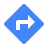

In [122]:
ttt = soup.select("body")
ttt

In [118]:
ggg = soup.find_all("div", id="gac_scont")
ggg

[]

In [114]:
ggg = soup.find_all("div", class_="main")
ggg

[]

In [49]:
title_list=[result.find("a").text for result in search_text]
title_list

AttributeError: 'int' object has no attribute 'text'

In [53]:
search_text

['全部影片圖片新聞',
 '',
 '',
 '全部影片圖片新聞',
 'HoHo好服務 清潔送洗到府服務 - HoHo好服務 首選居家預約平台  廣告  -  www.hohoho.com.tw/hoho好服務/居家清潔     全台優質多元化居家生活服務網，價格透明不亂加價，千位網友口碑推薦，登入會員立即預約生活服務   ',
 '   全台優質多元化居家生活服務網，價格透明不亂加價，千位網友口碑推薦，登入會員立即預約生活服務   ',
 '全台NO1 即時預約24HR - 鐘點清潔 3 小時1200  廣告  -  www.jackercleaning.com/     居家清潔範圍涵蓋 大台北、桃竹、台中、高雄、台南、基隆   ',
 '   居家清潔範圍涵蓋 大台北、桃竹、台中、高雄、台南、基隆   ',
 '呼叫黃背心，解決居家大小事 - 專業居家清潔 家電清潔、修繕 - yellow885.com.tw  廣告  -  www.yellow885.com.tw/     提供多元化居家服務，價格透明決不亂喊價， 多年經驗專業師傅為您服務。為您把關生活品質   ',
 '   提供多元化居家服務，價格透明決不亂喊價， 多年經驗專業師傅為您服務。為您把關生活品質   ',
 'HoHo好服務｜居家清潔、家電清洗、整理收納首選預約服務平台  www.hohoho.com.tw     HoHo為全台首選居家服務預約平台，提供您居家清潔打掃、冷氣與洗衣機清洗、整理收納等服務，輕鬆預約家庭所需要的清潔與清洗服務。價格公開且擁有上萬筆好評，讓HoHo帶\xa0...  居家清潔服務  ·  鐘點清潔  ·  大掃除、裝潢清潔  ·  大掃除清潔服務(大台北   ',
 '   HoHo為全台首選居家服務預約平台，提供您居家清潔打掃、冷氣與洗衣機清洗、整理收納等服務，輕鬆預約家庭所需要的清潔與清洗服務。價格公開且擁有上萬筆好評，讓HoHo帶\xa0...  居家清潔服務  ·  鐘點清潔  ·  大掃除、裝潢清潔  ·  大掃除清潔服務(大台北   ',
 'HOHO   水晶寶寶 - 繁體中文  www.crystalhoho111.com › categories › 能量商品     HOHO   水晶寶寶. 商品排序. 商品排序; 上架時間: 由新到舊; 

In [46]:
regex = re.compile('[a-zA-Z]')
for EachPart in soup.find_all("div", {"class" : regex}):
    print(EachPart.get_text())

全部影片圖片新聞


全部影片圖片新聞
HoHo好服務 清潔送洗到府服務 - HoHo好服務 首選居家預約平台  廣告  -  www.hohoho.com.tw/hoho好服務/居家清潔     全台優質多元化居家生活服務網，價格透明不亂加價，千位網友口碑推薦，登入會員立即預約生活服務   
   全台優質多元化居家生活服務網，價格透明不亂加價，千位網友口碑推薦，登入會員立即預約生活服務   
全台NO1 即時預約24HR - 鐘點清潔 3 小時1200  廣告  -  www.jackercleaning.com/     居家清潔範圍涵蓋 大台北、桃竹、台中、高雄、台南、基隆   
   居家清潔範圍涵蓋 大台北、桃竹、台中、高雄、台南、基隆   
呼叫黃背心，解決居家大小事 - 專業居家清潔 家電清潔、修繕 - yellow885.com.tw  廣告  -  www.yellow885.com.tw/     提供多元化居家服務，價格透明決不亂喊價， 多年經驗專業師傅為您服務。為您把關生活品質   
   提供多元化居家服務，價格透明決不亂喊價， 多年經驗專業師傅為您服務。為您把關生活品質   
HoHo好服務｜居家清潔、家電清洗、整理收納首選預約服務平台  www.hohoho.com.tw     HoHo為全台首選居家服務預約平台，提供您居家清潔打掃、冷氣與洗衣機清洗、整理收納等服務，輕鬆預約家庭所需要的清潔與清洗服務。價格公開且擁有上萬筆好評，讓HoHo帶 ...  居家清潔服務  ·  鐘點清潔  ·  大掃除、裝潢清潔  ·  大掃除清潔服務(大台北   
   HoHo為全台首選居家服務預約平台，提供您居家清潔打掃、冷氣與洗衣機清洗、整理收納等服務，輕鬆預約家庭所需要的清潔與清洗服務。價格公開且擁有上萬筆好評，讓HoHo帶 ...  居家清潔服務  ·  鐘點清潔  ·  大掃除、裝潢清潔  ·  大掃除清潔服務(大台北   
HOHO   水晶寶寶 - 繁體中文  www.crystalhoho111.com › categories › 能量商品     HOHO   水晶寶寶. 商品排序. 商品排序; 上架時間: 由新到舊; 上架時間: 由舊到新; 價格: 由高至低; 價格: 由低至高. 每頁顯示24 個.  天使羽翼藍針白水晶  · 